In [1]:
import numpy as np
import qnm_filter
import matplotlib.pyplot as pl
import re

In [3]:
[signalH_noise, signalL_noise, NR_signal220_330, time_arr] = np.loadtxt("BBH:1107_realisation0.txt")
file = open("BBH:1107_realisation0.txt")
header = file.readline()[2:]
mass_patt = r"remnant_mass=(\d+\.\d+),"
remnant_mass = float(re.search(mass_patt, header).group(1))
mass = qnm_filter.Filter.mass_unit(remnant_mass)
chi_patt = r"remnant_chi=(\d+\.\d+),"
remnant_chi = float(re.search(chi_patt, header).group(1))


[signalH_noise, signalL_noise, NR_signal220, time_arr] = np.loadtxt("BBH:1107_only22.txt")
mass = qnm_filter.Filter.mass_unit(remnant_mass)

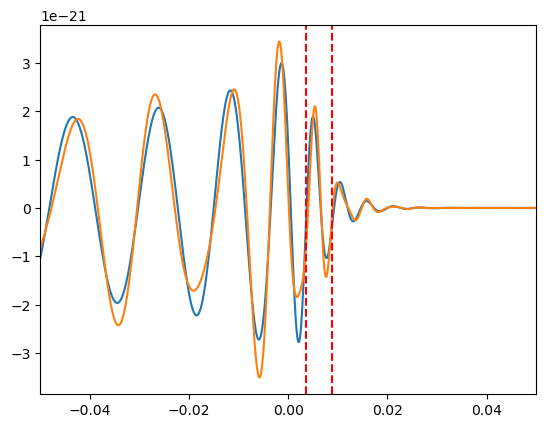

In [16]:
pl.plot(time_arr, NR_signal220)
pl.plot(time_arr, NR_signal220_330)
pl.xlim(-0.05, 0.05)
pl.axvline(10*mass, c='r', ls='--')
pl.axvline(25*mass, c='r', ls='--')

In [5]:
model_list=[]
for l in range(2,8):
    for m in range(-l,l+1):
        for n in range(0,2):
            if m>0:
                p='p' # p refers to prograde mode
            else:
                p='r' # r refers to retrograde mode
            model_list.extend([(l,m,n,p)])
freq_list = qnm_filter.Filter(chi=remnant_chi, mass=0.991747211983,
                              model_list=model_list).get_freq_list

In [6]:
start=0
end=100
truncated = waveform.truncate_data(start, end)
padded = truncated.pad_complex_data_for_fft(2, 2)

NameError: name 'waveform' is not defined

In [7]:
pl.semilogy(padded.shifted_fft_freq, abs(padded.shifted_fft_data), label='Start=%dM, filtered out 220' % start)
pl.axvline(freq_list['220'].real,label='Mode: 22',ls = '--', color='r')
pl.axvline(freq_list['330'].real,label='Mode: 33',ls = '--', color='r')
pl.xlim(-3, 3)

NameError: name 'padded' is not defined

In [8]:
filter_in_freq = qnm_filter.Filter(chi=remnant_chi, mass=remnant_mass, model_list=[(2,2,0,'p')]).NR_filter(padded.shifted_fft_freq)
pl.semilogy(padded.shifted_fft_freq, abs(filter_in_freq*padded.shifted_fft_data), label='Start=%dM, filtered out 220' % start)
pl.axvline(freq_list['220'].real,label='Mode: 22',ls = '--', color='r')
pl.axvline(freq_list['330'].real,label='Mode: 33',ls = '--', color='r')
pl.xlim(-3, 3)

NameError: name 'padded' is not defined

## Using SXSWaveforms

In [9]:
NRwaveform = qnm_filter.SXSWaveforms(filename="SXS:BBH:1107")
NRwaveform.get_remnant_data()
NRwaveform.original_data=qnm_filter.ComplexData(NR_signal.astype(complex), time_arr/mass)
NRwaveform.merger_time=0

Found the following files to load from the SXS catalog:
    SXS:BBH:1107v5/Lev4/metadata.json


In [11]:
modelist = []
no_filter=NRwaveform.add_filter('22',modelist)
modelist.extend([(2,2,0,'p'),])
filtered220=NRwaveform.add_filter('22',modelist)

KeyError: '22'